In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.svm  import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report,recall_score,precision_score,f1_score,confusion_matrix,ConfusionMatrixDisplay,roc_curve,auc,precision_recall_curve
from sklearn.tree import DecisionTreeClassifier


In [2]:
# Load the dataset into a pandas DataFrame
df = pd.read_csv('Heart_health.csv')



In [3]:
df.shape

(724, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 724 entries, 0 to 723
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ID                    724 non-null    int64 
 1   Age                   724 non-null    int64 
 2   Gender                724 non-null    object
 3   Height(cm)            724 non-null    int64 
 4   Weight(kg)            724 non-null    int64 
 5   Blood Pressure(mmHg)  724 non-null    object
 6   Cholesterol(mg/dL)    724 non-null    int64 
 7   Glucose(mg/dL)        724 non-null    int64 
 8   Smoker                724 non-null    object
 9   Exercise(hours/week)  724 non-null    int64 
 10  Heart Attack          724 non-null    int64 
dtypes: int64(8), object(3)
memory usage: 62.3+ KB


In [5]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()

# Print out columns with missing values and their corresponding counts
print("Columns with Missing Values:")
print(missing_values)


Columns with Missing Values:
ID                      0
Age                     0
Gender                  0
Height(cm)              0
Weight(kg)              0
Blood Pressure(mmHg)    0
Cholesterol(mg/dL)      0
Glucose(mg/dL)          0
Smoker                  0
Exercise(hours/week)    0
Heart Attack            0
dtype: int64


In [6]:
df = df.drop('ID', axis=1)

In [7]:
df.describe()

,Age,Height(cm),Weight(kg),Cholesterol(mg/dL),Glucose(mg/dL),Exercise(hours/week),Heart Attack
count,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000
mean,44.842541,171.161602,75.610497,206.022099,92.179558,2.770718,0.599448
std,8.162429,6.242018,6.368595,11.224704,4.662712,0.934907,0.490349
min,30.000000,155.000000,60.000000,170.000000,75.000000,1.000000,0.000000
25%,38.000000,166.000000,71.000000,195.000000,88.000000,2.000000,0.000000
50%,44.000000,170.000000,75.000000,210.000000,92.000000,3.000000,1.000000
75%,53.000000,177.000000,81.000000,215.000000,96.000000,4.000000,1.000000
max,60.000000,183.000000,89.000000,230.000000,100.000000,4.000000,1.000000


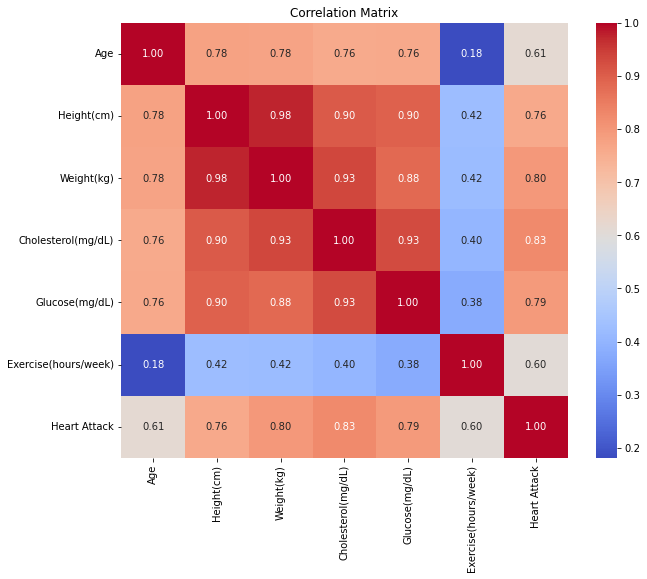

In [8]:


# Calculate correlation matrix
correlation_matrix = df.corr()

# Visualize the correlation matrix using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


<AxesSubplot:xlabel='Heart Attack', ylabel='count'>

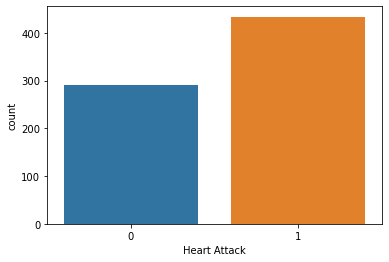

In [9]:
# Number of positive and negative classes 
sns.countplot(x=df['Heart Attack'])

C:\Users\Njoroge\anaconda3.0\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Heart Attack', ylabel='count'>

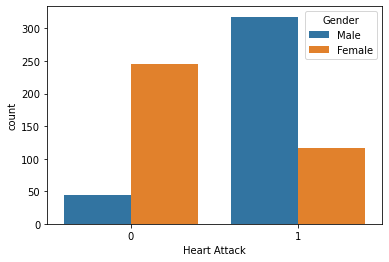

In [10]:
# percentage of feamale and male population with heart attack risk
sns.countplot(df['Heart Attack'],hue=df['Gender'])

C:\Users\Njoroge\anaconda3.0\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Smoker', ylabel='count'>

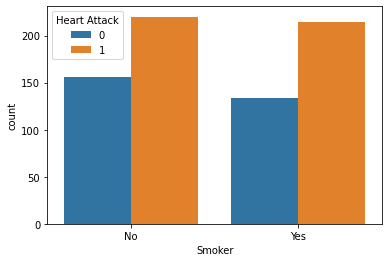

In [11]:
# Visualising Smoker classes subjected to low and high risk of heart attack 
sns.countplot(df['Smoker'],hue=df['Heart Attack'])

C:\Users\Njoroge\anaconda3.0\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


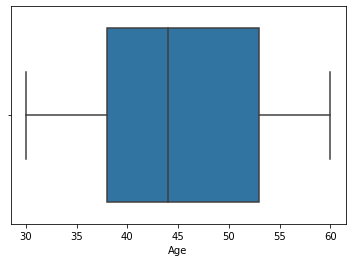

In [12]:
# To check for outliers in the age feature
sns.boxplot(df['Age'])
plt.show()

C:\Users\Njoroge\anaconda3.0\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


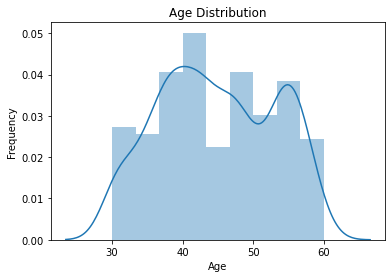

In [13]:
# Visualize age distribution using a histogram
sns.distplot(df['Age'])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()


C:\Users\Njoroge\anaconda3.0\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


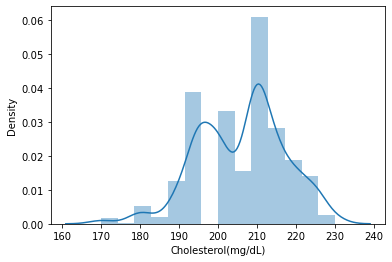

In [15]:
# Distribution of cholestrol feature
sns.distplot(df['Cholesterol(mg/dL)'])
plt.show()

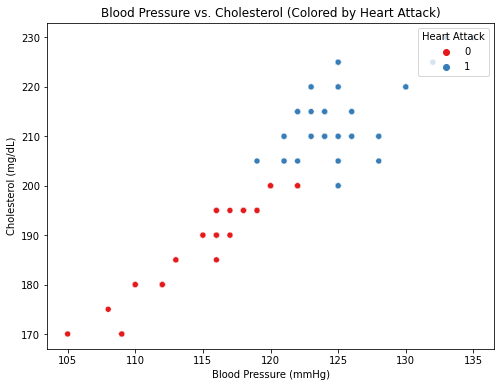

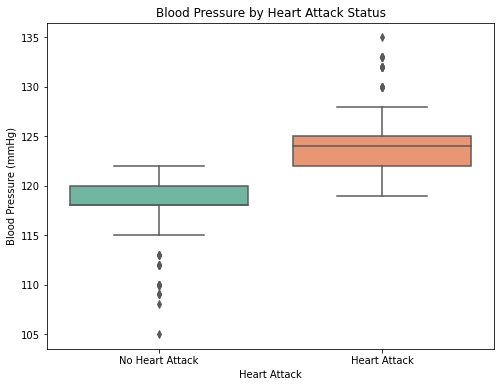

Mean Blood Pressure for individuals without heart attacks: 118.15 mmHg
Mean Blood Pressure for individuals with heart attacks: 124.01 mmHg


In [16]:
# Preprocess the 'Blood Pressure(mmHg)' column to extract only the numerical values
df['Blood Pressure(mmHg)'] = df['Blood Pressure(mmHg)'].str.split('/').str[0].astype(int)
# Scatter plot of blood pressure vs. cholesterol colored by heart attack status
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Blood Pressure(mmHg)', y='Cholesterol(mg/dL)', hue='Heart Attack', palette='Set1')
plt.title('Blood Pressure vs. Cholesterol (Colored by Heart Attack)')
plt.xlabel('Blood Pressure (mmHg)')
plt.ylabel('Cholesterol (mg/dL)')
plt.legend(title='Heart Attack', loc='upper right')
plt.show()

# Box plot of blood pressure by heart attack status
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Heart Attack', y='Blood Pressure(mmHg)', palette='Set2')
plt.title('Blood Pressure by Heart Attack Status')
plt.xlabel('Heart Attack')
plt.ylabel('Blood Pressure (mmHg)')
plt.xticks(ticks=[0, 1], labels=['No Heart Attack', 'Heart Attack'])
plt.show()

# Calculate mean blood pressure for individuals with and without heart attacks
mean_bp_no_attack = df[df['Heart Attack'] == 0]['Blood Pressure(mmHg)'].mean()
mean_bp_attack = df[df['Heart Attack'] == 1]['Blood Pressure(mmHg)'].mean()

print(f"Mean Blood Pressure for individuals without heart attacks: {mean_bp_no_attack:.2f} mmHg")
print(f"Mean Blood Pressure for individuals with heart attacks: {mean_bp_attack:.2f} mmHg")

In [17]:
# Encode gender to numeric values (Male: 0, Female: 1)
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
df['Smoker'] = df['Smoker'].map({'No': 0, 'Yes': 1})

In [18]:
X = df.drop('Heart Attack', axis=1)
Y = df['Heart Attack']

In [19]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [20]:
models = [LogisticRegression(),SVC(kernel='linear'),KNeighborsClassifier(),RandomForestClassifier(random_state=42),DecisionTreeClassifier(),ExtraTreesClassifier(),GradientBoostingClassifier(random_state=42)]

In [21]:
def pred_modelling(models,X,Y):
    from sklearn.model_selection import train_test_split
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
    
    for i in models:
        print(i)
        model = i.fit(X_train,Y_train)
        Y_pred = model.predict(X_test)
        print(f'Accuracy Score:{accuracy_score(Y_test,Y_pred)}')
        print(f'Precision Score:{precision_score(Y_test,Y_pred)}')
        print(f'Recall Score:{recall_score(Y_test,Y_pred)}')
        print(f'F1 Score:{f1_score(Y_test,Y_pred)}')
        cm = confusion_matrix(Y_pred,Y_test, labels=model.classes_)
        ConfusionMatrixDisplay(cm,display_labels =['No Risk','High Risk']).plot()
        plt.show()
        print(' ')

LogisticRegression()


C:\Users\Njoroge\anaconda3.0\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy Score:0.993103448275862
Precision Score:0.9885057471264368
Recall Score:1.0
F1 Score:0.9942196531791908


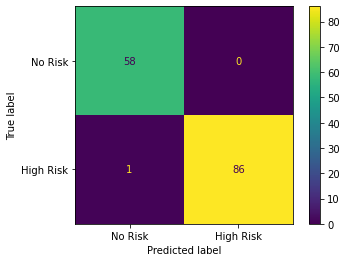

 
SVC(kernel='linear')
Accuracy Score:1.0
Precision Score:1.0
Recall Score:1.0
F1 Score:1.0


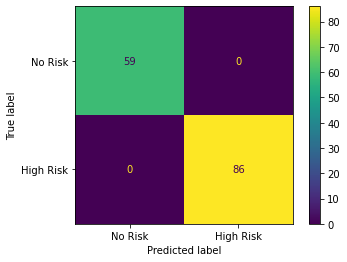

 
KNeighborsClassifier()
Accuracy Score:1.0
Precision Score:1.0
Recall Score:1.0
F1 Score:1.0


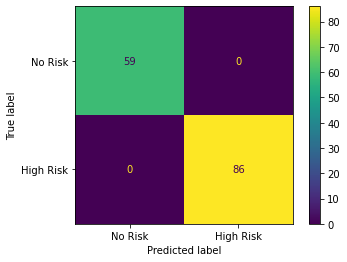

 
RandomForestClassifier(random_state=42)
Accuracy Score:1.0
Precision Score:1.0
Recall Score:1.0
F1 Score:1.0


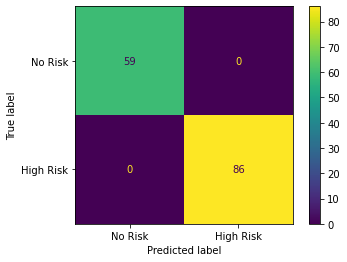

 
DecisionTreeClassifier()
Accuracy Score:0.993103448275862
Precision Score:0.9885057471264368
Recall Score:1.0
F1 Score:0.9942196531791908


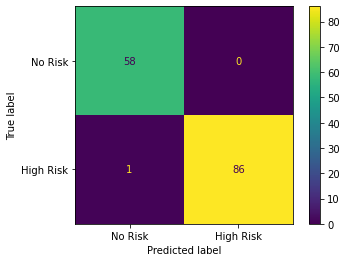

 
ExtraTreesClassifier()
Accuracy Score:1.0
Precision Score:1.0
Recall Score:1.0
F1 Score:1.0


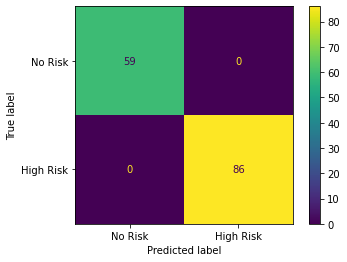

 
GradientBoostingClassifier(random_state=42)
Accuracy Score:0.9862068965517241
Precision Score:0.9772727272727273
Recall Score:1.0
F1 Score:0.9885057471264368


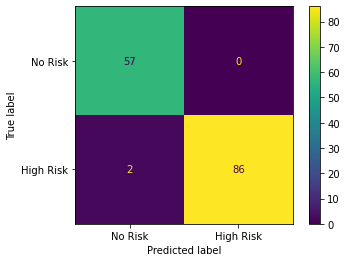

In [22]:
pred_modelling(models,X,Y)